In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
#Reading companies.txt in pandas 
company = pd.read_csv('/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment1/companies.txt', encoding = "ISO-8859-1", sep = '\t')
company.head()
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [2]:
#Reading rounds2.csv
roundcsv =pd.read_csv('/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment1/rounds2.csv', encoding='ISO-8859-1')
roundcsv.head()
roundcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [3]:
#Question 1: Table 1
#How many unique companies are present in rounds2?
len(roundcsv.company_permalink.str.lower().unique())
print(len(roundcsv.company_permalink.str.lower().unique()))
roundcsv_len = len(roundcsv.company_permalink.str.lower().unique())
str_roundcsv = str(roundcsv_len)

66373


In [4]:
#Question 2:Table1
#How many unique companies are present in the companies file??
len(company['permalink'].str.lower().unique())
print(len(company['permalink'].str.lower().unique()))
company_len = len(company['permalink'].str.lower().unique())
str_com = str(company_len)

66368


In [5]:
#Question 4:Table1
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
str_com == str_roundcsv

False

In [6]:
#Question5:
#Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
roundcsv['company_permalink'] = list(map(lambda x : x.upper() , roundcsv['company_permalink']))
company['permalink'] = list(map(lambda x : x.upper(), company['permalink']))

In [7]:
#Renamimg the unique field of both compnay and round to permalink
roundcsv.rename(columns={'company_permalink':'permalink'}, inplace=True)


In [8]:
#Merged the both company and roundcsv
master_frame = pd.merge(roundcsv, company, how = 'left', on ='permalink')

In [9]:
#Question5:table1
#Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
master_frame.head()
len(master_frame)
master_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114880 non-null object
homepage_url               108753 non-null object
category_list              111493 non-null object
status                     114881 non-null object
country_code               106241 non-null object
state_code                 103975 non-null object
region                     104752 non-null object
city                       104755 non-null object
founded_at                 94390 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64


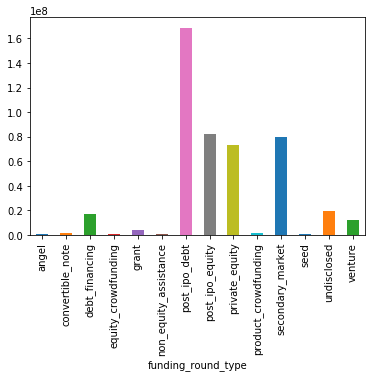

In [10]:

#Question 1,2,3,4, Table 2
#get the funding details
fundingtype = master_frame.groupby('funding_round_type')
fundingtype['funding_round_type']
fund_type_avg = fundingtype['raised_amount_usd'].mean()
fund_type_range  = (fund_type_avg >= 5000000)&(fund_type_avg <= 15000000)
fund_type_avg.plot(kind='bar')


              raised_amount_usd
country_code                   
USA                6.694815e+11
CHN                7.570357e+10
GBR                3.276689e+10
IND                2.768634e+10
CAN                1.842468e+10
RUS                1.127912e+10
DEU                1.001634e+10
ISR                9.713885e+09
FRA                9.038567e+09


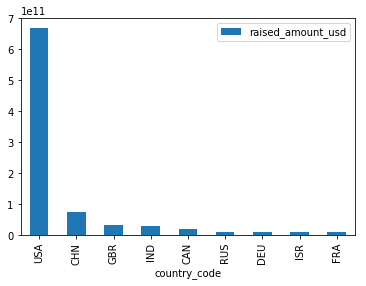

In [11]:
#Question 1,2,3 :Table 3
top9= master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]
top9.plot(kind='bar')
print(top9)
master_frame = master_frame.drop(['funding_round_permalink', 'funded_at', 'homepage_url',
                                  'funded_at','status'], axis = 1)

In [12]:
#Considering only Venture funding data from master merge
master_venture = master_frame[master_frame.funding_round_type == 'venture']
mappingcsv = pd.read_csv('/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment1/mapping.csv')
mappingcsv.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [13]:
#get primary sector
master_frame['category_list'] = master_frame['category_list'].astype(str)
primary_sector = master_frame['category_list'].apply(lambda cl: cl.split('|')[0])



In [14]:
master_venture['Primary_Sector']=primary_sector
master_venture

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,permalink,funding_round_type,funding_round_code,raised_amount_usd,name,category_list,country_code,state_code,region,city,founded_at,Primary_Sector
0,/ORGANIZATION/-FAME,venture,B,10000000.0,#fame,Media,IND,16,Mumbai,Mumbai,NaN,Media
1,/ORGANIZATION/-QOUNTER,venture,A,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,B,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,NaN,Apps
4,/ORGANIZATION/0-6-COM,venture,A,2000000.0,0-6.com,Curated Web,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
5,/ORGANIZATION/004-TECHNOLOGIES,venture,NaN,NaN,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,NaN,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/ORGANIZATION/0XDATA,venture,B,20000000.0,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/ORGANIZATION/0XDATA,venture,NaN,1700000.0,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/ORGANIZATION/0XDATA,venture,A,8900000.0,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/ORGANIZATION/1-MAINSTREAM,venture,NaN,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps


In [15]:
#Replacing all  0 as na
mappingcsv['category_list']=mappingcsv['category_list'].str.replace('0','na')


In [16]:
mappingcsv.columns

Index([u'category_list', u'Automotive & Sports', u'Blanks',
       u'Cleantech / Semiconductors', u'Entertainment', u'Health',
       u'Manufacturing', u'News, Search and Messaging', u'Others',
       u'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [17]:
#Pandas melt() function is used to change the DataFrame format from wide to long.

master_catergory=pd.melt(mappingcsv, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [18]:


master_catergory.head(30)

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [19]:
master_catergory=master_catergory[master_catergory.value==1]

In [20]:
master_catergory=master_catergory.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [21]:
master_catergory=master_catergory.drop('value',axis=1)

In [22]:
master_FT = pd.merge(master_venture,master_catergory,on='Primary_Sector',how='inner')

In [23]:
master_FT=master_FT[master_FT.main_sector!='Blanks']
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          899
Cleantech / Semiconductors                 10646
Entertainment                               3331
Health                                      4393
Manufacturing                               3790
News, Search and Messaging                  6954
Others                                     12957
Social, Finance, Analytics, Advertising    11178
Name: main_sector, dtype: int64

In [24]:
#funding type FT falling within the 5-15 million USD range stored in standard_range
standard_range= master_FT[(master_frame.raised_amount_usd > 5000000) & (master_frame.raised_amount_usd < 15000000)]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
#Investment and sector calculation for USA
D1 = standard_range[standard_range['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [26]:
#Investment and sector calculation for GBR
D2 = standard_range[standard_range['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_usd'].transform('sum'))


In [27]:
#Investment and sector calculation for IND
D3 = standard_range[standard_range['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [28]:
standard_range[standard_range['main_sector'].isnull()]

,permalink,funding_round_type,funding_round_code,raised_amount_usd,name,category_list,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector


In [29]:
D1

,permalink,funding_round_type,funding_round_code,raised_amount_usd,name,category_list,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
50,/ORGANIZATION/PLUMTV,venture,NaN,20000000.0,PlumTV,Media|Television|Web Hosting,USA,NY,New York City,New York,01-01-2002,Media,Entertainment,240,1.766904e+09
99,/ORGANIZATION/CALXEDA,venture,B,20000000.0,Calxeda,Application Platforms|Data Centers|Software,USA,TX,Austin,Austin,01-01-2008,Application Platforms,"News, Search and Messaging",615,5.561458e+09
100,/ORGANIZATION/CALXEDA,venture,A,8000000.0,Calxeda,Application Platforms|Data Centers|Software,USA,TX,Austin,Austin,01-01-2008,Application Platforms,"News, Search and Messaging",615,5.561458e+09
133,/ORGANIZATION/METAVINE,venture,A,5500000.0,Metavine,Application Platforms|Software,USA,CA,SF Bay Area,San Mateo,01-01-2013,Application Platforms,"News, Search and Messaging",615,5.561458e+09
141,/ORGANIZATION/NUXEO,venture,NaN,3800000.0,Nuxeo,Application Platforms|Document Management|Ente...,USA,NY,New York City,Brooklyn,01-12-2000,Application Platforms,"News, Search and Messaging",615,5.561458e+09
148,/ORGANIZATION/OUTSYSTEMS,venture,B,3220000.0,OutSystems,Application Platforms|Enterprise Application|E...,USA,GA,Atlanta,Atlanta,01-03-2001,Application Platforms,"News, Search and Messaging",615,5.561458e+09
211,/ORGANIZATION/APP-VIRALITY,venture,NaN,NaN,AppVirality Inc,Apps|Mobile Software Tools,USA,AZ,Phoenix,Phoenix,01-01-2014,Apps,"News, Search and Messaging",615,5.561458e+09
216,/ORGANIZATION/APPDIRECT,venture,B,9000000.0,AppDirect,Apps|Enterprise Software|IaaS|PaaS|SaaS,USA,CA,SF Bay Area,San Francisco,17-07-2009,Apps,"News, Search and Messaging",615,5.561458e+09
229,/ORGANIZATION/ARCHIVE-2,venture,NaN,18000000.0,Archive,Apps|B2B|Service Providers,USA,CA,Los Angeles,Culver City,NaN,Apps,"News, Search and Messaging",615,5.561458e+09
239,/ORGANIZATION/BANDSINTOWN-GROUP,venture,A,10000000.0,Bandsintown Group,Apps|Big Data|Email Marketing|Mobile|Music|Soc...,USA,NY,New York City,New York,01-01-2004,Apps,"News, Search and Messaging",615,5.561458e+09


In [30]:
#Total number of Investments (count) :Q1 USA :Table 5
D1.count_of_invest.sum()

4713113

In [31]:
#Total amount of investment (USD) :Q2 USA :Table 5
D1.raised_amount_usd.sum()


52029810881.0

In [32]:
#Total number of Investments (count) :Q1 GBR :Table 5
D2.count_of_invest.sum()

16052

In [33]:
#Total amount of investment (USD) :Q2 GBR :Table 5
D2.raised_amount_usd.sum()

2719065616.0

In [34]:
#Total number of Investments (count) :Q1 IND:Table 5
D3.count_of_invest.sum()

4345

In [35]:
#Total amount of investment (USD) :Q2 IND :Table 5
D3.raised_amount_usd.sum()

2707253220.0

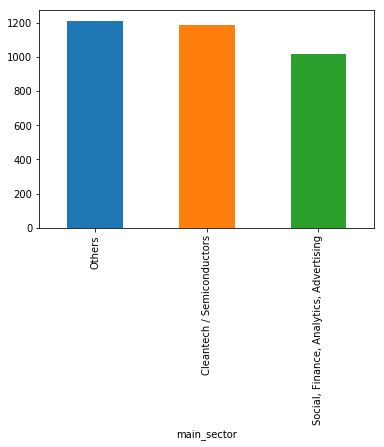

In [36]:
#Question 3,4,5,6,7,8 :USA
D1_Fisrt_three_mainsector = D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
#First three in the output displayed is the answer
D1_Fisrt_three_mainsector.head(3)
graph_D1_sector =D1_Fisrt_three_mainsector.head(3)
graph_D1_sector.plot(kind='bar')

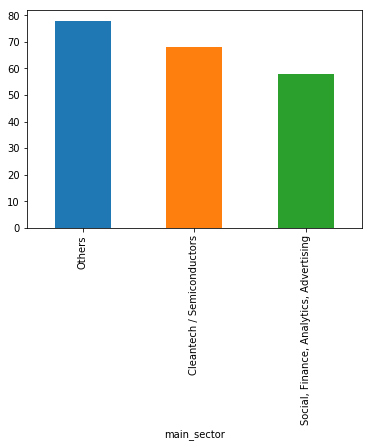

In [37]:
#Question 3,4,5,6,7,9 :GBR
D2_Fisrt_three_mainsector = D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)
#First three in the output displayed is the answer
D2_Fisrt_three_mainsector.head(3)
graph_D2_sector = D2_Fisrt_three_mainsector.head(3)
graph_D2_sector.plot(kind='bar')

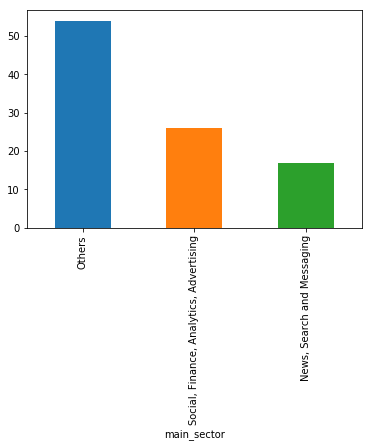

In [38]:
#Question 3,4,5,6,7,8 :IND
D3_Fisrt_three_mainsector = D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)

#First three in the output displayed is the answer
D3_Fisrt_three_mainsector.head(3)
graph_D3_sector = D3_Fisrt_three_mainsector.head(3)
graph_D3_sector
graph_D3_sector.plot(kind='bar')

In [39]:
#Question 9 :USA
D1_Firstsector_compname = D1[D1.main_sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending = False)['name']
D1_Firstsector_compname.head(1)

21394    Zenefits
Name: name, dtype: object

In [40]:
D2_Firstsector_compname = D2[D2.main_sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending = False)['name']
D2_Firstsector_compname.head(1)

2676    Avecto
Name: name, dtype: object

In [41]:
D3_Firstsector_compname = D3[D3.main_sector == 'Others'].sort_values(by = 'raised_amount_usd', ascending = False)['name']
D3_Firstsector_compname.head(1)

24472    Flipkart
Name: name, dtype: object

In [42]:
D1_Secondsector_comp = D1[D1.main_sector == 'Cleantech / Semiconductors'].sort_values(by = 'raised_amount_usd', ascending = False)['name']
D1_Secondsector_comp.head(1)

10524    Jazz Pharmaceuticals
Name: name, dtype: object

In [43]:
D2_Secondsector_comp = D2[D2.main_sector == 'Cleantech / Semiconductors'].sort_values(by = 'raised_amount_usd', ascending = False)['name']
D2_Secondsector_comp.head(1)

8425    Cell Medica
Name: name, dtype: object

In [44]:
D3_Secondsector_comp = D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd', ascending = False)['name']
D3_Secondsector_comp.head(1)

42864    yepme.com
Name: name, dtype: object

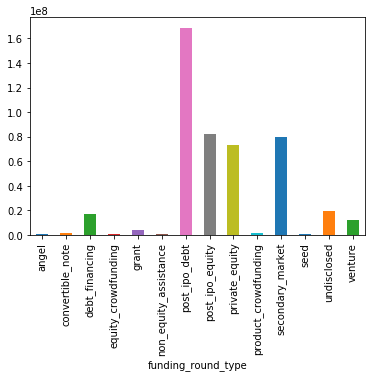

In [45]:
#A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type
fund_type_avg.plot(kind='bar')

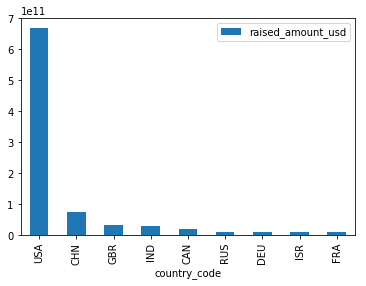

In [46]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT:

top9.plot(kind='bar')

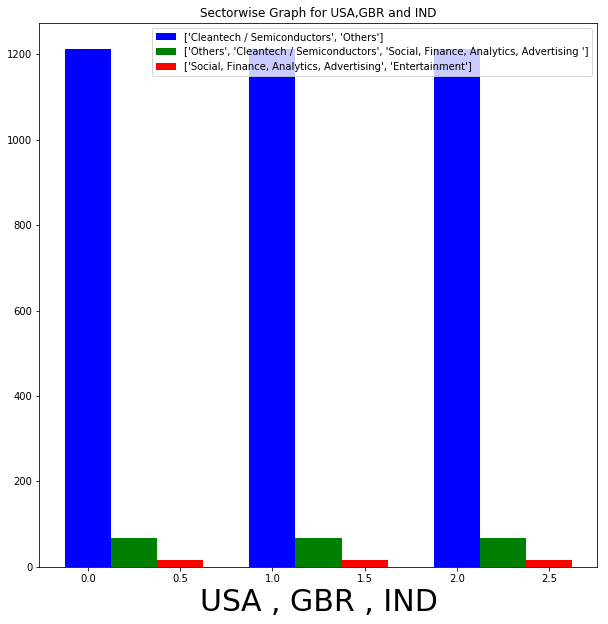

In [47]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

X = np.arange(3)
plt.figure(figsize=(10,10))
plt.bar(X + 0.00, graph_D1_sector[0], color = 'b', width = 0.25,label=["Cleantech / Semiconductors","Others"])
plt.bar(X + 0.25, graph_D2_sector[1], color = 'g', width = 0.25,label=["Others","Cleantech / Semiconductors","Social, Finance, Analytics, Advertising "])
plt.bar(X + 0.50, graph_D3_sector[2], color = 'r', width = 0.25,label=["Social, Finance, Analytics, Advertising","Entertainment"])
plt.title('Sectorwise Graph for USA,GBR and IND')
plt.legend(loc="upper right")
plt.xlabel('USA , GBR , IND',fontsize=30,horizontalalignment='center' )


plt.show()

